## Exercise: Signal Selection and Invariant Mass

This example starts with a very simple toy model and uses pandas. Here's the toy:

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng()

N = 10_000

df = pd.DataFrame({
    "event_id": np.arange(N),
    "px": rng.normal(0, 20, size=N),
    "py": rng.normal(0, 20, size=N),
    "pz": rng.normal(0, 50, size=N),
    "E": rng.normal(100, 10, size=N),
    "label": rng.choice(["signal", "background"], size=N, p=[0.1, 0.9]),
})

We are generating some unphysical events, but that's fine for now, we will filter them later.

In [2]:
df

,event_id,px,py,pz,E,label
0,0,39.842189,-12.187373,48.251533,99.673517,background
1,1,1.251862,-1.932801,19.211143,96.477413,background
2,2,24.867766,-10.772423,-72.007379,96.682095,signal
3,3,29.999622,-20.168628,-80.223972,102.188140,background
4,4,-29.887234,13.302332,1.014010,87.621084,background
...,...,...,...,...,...,...
9995,9995,5.808365,-13.844433,11.886233,95.065217,background
9996,9996,47.794724,16.443474,-36.860464,107.828968,background
9997,9997,26.211772,-23.798504,21.352053,103.279465,background
9998,9998,5.470663,6.297953,-18.573226,94.750028,background


## Step 1: Compute transverse momentum

$$
p_T = \sqrt{p_x^2 + p_y^2}
$$

<!--
df["pt"] = np.sqrt(df.px**2 + df.py**2)
-->

In [4]:
df["px"] * df["px"]

0       1587.400048
1          1.567157
2        618.405781
3        899.977301
4        893.246736
           ...     
9995      33.737102
9996    2284.335601
9997     687.056996
9998      29.928151
9999     115.708471
Name: px, Length: 10000, dtype: float64

In [5]:
df["pt"] = np.sqrt(df["px"]* df["px"] + df["py"]*df["py"])

In [6]:
df["pt"]

0       41.664519
1        2.302798
2       27.100754
3       36.149009
4       32.713893
          ...    
9995    15.013508
9996    50.544272
9997    35.403754
9998     8.342203
9999    25.858004
Name: pt, Length: 10000, dtype: float64

## Step 2: Select signal events with pt > 30

<!--
signal_highpt = df[(df.label == "signal") & (df.pt > 30)]
-->

In [15]:
signal_highpt = df[df["pt"] > 30].copy()

Histogram of number of signal events vs pt

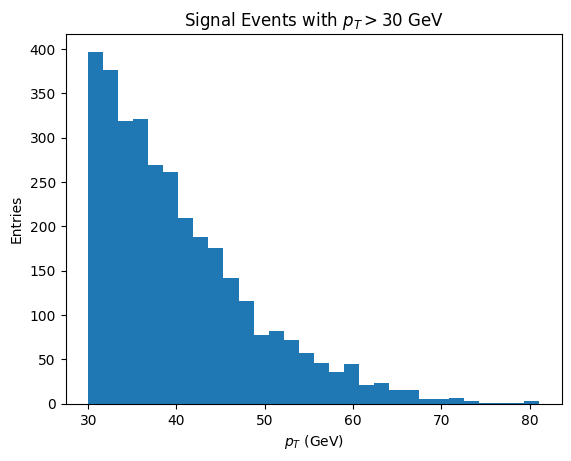

In [8]:
signal_highpt.pt.plot.hist(bins=30)
plt.title("Signal Events with $p_T > 30$ GeV")
plt.xlabel("$p_T$ (GeV)")
plt.ylabel("Entries")
plt.show()

## Step 3: Compute invariant mass:

$$
m^2 = E^2 - \vec{p}^2
$$

<!--
df["mass_squared"] = df.E**2 - (df.px**2 + df.py**2 + df.pz**2)
-->

In [17]:
df["mass_squared"] = df["E"]*df["E"] - df["px"]*df["px"] - df["py"]*df["py"] - df["pz"]*df["pz"]

In [18]:
df["mass_squared"] = df["E"]**2 - (df["px"]**2 + df["py"]**2 + df["pz"]**2)

# Filter unphysical entries from our simple generation
df = df[df.mass_squared > 0]

df["mass"] = np.sqrt(df.mass_squared)

In [19]:
df["mass"]

0        83.419183
1        96.008026
2        99.175715
3        85.410108
4       102.034683
           ...    
9994     30.826518
9995     68.015961
9996    100.903154
9997     97.541215
9999     92.906788
Name: mass, Length: 9386, dtype: float64

## Plot histogram of invariant mass for all events

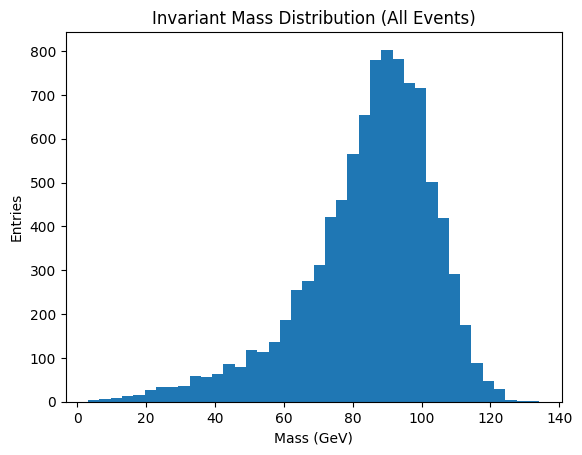

In [20]:
df.mass.plot.hist(bins=40)
plt.title("Invariant Mass Distribution (All Events)")
plt.xlabel("Mass (GeV)")
plt.ylabel("Entries")
plt.show()